In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from TAPE.utils import CCCscore, L1error

In [2]:
sns.set_context("paper")

### Test for CIBERSORTx's group mode

In [31]:
data8k = pd.read_csv('~/Downloads/data8k_ref.txt',sep='\t',index_col=0)
monaco = pd.read_csv('~/Downloads/monaco_groupmode1/monaco_group_GEP.txt',sep='\t',index_col=0)

In [55]:
monaco = pd.read_csv('~/Downloads/monaco_pbmc.txt',sep='\t',index_col=0)

In [58]:
for i in range(monaco.shape[1]):
    print(np.sum(monaco.iloc[:,i]>0)/17487)

0.9719791845370847
0.9552810659346943
0.9695774003545491
0.9655744267169898
0.9681477669125637
0.9707782924458169
0.9809572825527535
0.9774689769543089
0.9755246754732086
0.9767255675644765
0.972836964602276
0.9703779950820609


In [32]:
data8k = data8k.groupby(data8k.index).sum().T

In [33]:
data8k = np.log(data8k+1)
monaco = np.log(monaco+1)

In [34]:
inter = data8k.index.intersection(monaco.index)

In [35]:
data8k = data8k.loc[inter]
monaco = monaco.loc[inter]

In [36]:
data8k = data8k[['Bcells', 'CD4Tcells', 'CD8Tcells', 'Dendritics', 'Monocytes', 'NK']]
monaco = monaco[['Bcells', 'CD4Tcells', 'CD8Tcells', 'Dendritics', 'Monocytes', 'NK']]

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data8k = scaler.fit_transform(data8k)
monaco = scaler.fit_transform(monaco)

In [38]:
monaco = monaco.T
data8k = data8k.T

In [39]:
for i in range(6):
    print(CCCscore(monaco[i],data8k[i]))

0.4907971069860762
0.37765539789125857
0.2691750731778654
0.3926930291324496
0.4779110303005678
0.44809740732687664


In [40]:
### ccc at gene level
real_gene_ccc = []
real_gene_pearson = []
for i in range(data8k.shape[1]):
    real_gene_pearson.append(np.corrcoef(data8k[:,i],monaco[:,i])[0,1])
    real_gene_ccc.append(CCCscore(data8k[:,i],monaco[:,i]))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


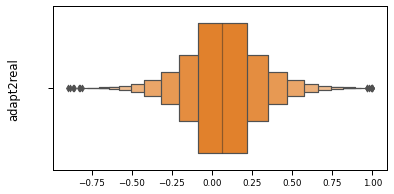

In [54]:
fig, ax = plt.subplots(figsize=(6, 3))
color = sns.color_palette()[1]
sns.boxenplot(real_gene_ccc,ax=ax,orient="v",color=color)
fig.supylabel('adapt2real')
fig.savefig('genelevel_ccc_csx.eps', format='eps', dpi=300)

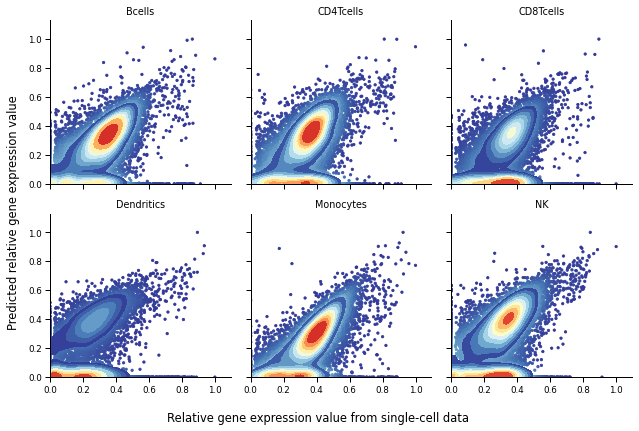

In [43]:
fig, axes = plt.subplots(2,3,sharex=True,sharey=True,figsize=(9, 6))
names=['Bcells', 'CD4Tcells', 'CD8Tcells', 'Dendritics', 'Monocytes', 'NK']
for i in range(6):
    values = np.vstack([data8k[i,:], monaco[i,:]])
    kernel = stats.gaussian_kde(values)(values)
    axes[i//3,i%3].scatter(x=data8k[i,:],y=monaco[i,:],cmap="RdYlBu_r",c=kernel,marker='.')
    sns.kdeplot(x=data8k[i,:],y=monaco[i,:],fill=True,thresh=0.2, cmap="RdYlBu_r",ax=axes[i//3,i%3])
    axes[i//3,i%3].set_title(names[i])
    axes[i//3,i%3].spines['top'].set_visible(False)
    axes[i//3,i%3].spines['right'].set_visible(False)
plt.xlim(0,)
plt.ylim(0,)
fig.supxlabel('Relative gene expression value from single-cell data')
fig.supylabel('Predicted relative gene expression value')
plt.tight_layout()
fig.savefig('concordance_real_CSx.eps', format='eps', dpi=300)
plt.show()

## test for TAPE's overall mode

In [22]:
orisigm = np.load('orisigm.npy')
testsigm = np.load('testsigm.npy')
trainsigm = np.load('trainsigm.npy')

In [4]:
# adapt to real bulk
for i in range(6):
    print(CCCscore(testsigm[i],orisigm[i]))

0.9094207222099532
0.870553118321613
0.8990793694036127
0.8532026503247175
0.47612136948473677
0.9653270746207356


In [30]:
### ccc at gene level
real_gene_ccc = []
real_gene_pearson = []
for i in range(orisigm.shape[1]):
    real_gene_pearson.append(np.corrcoef(testsigm[:,i],orisigm[:,i])[0,1])
    real_gene_ccc.append(CCCscore(testsigm[:,i],orisigm[:,i]))

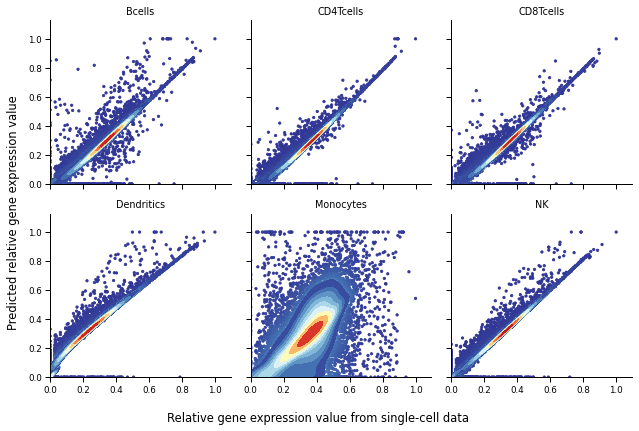

In [4]:
fig, axes = plt.subplots(2,3,sharex=True,sharey=True,figsize=(9, 6))
names=['Bcells', 'CD4Tcells', 'CD8Tcells', 'Dendritics', 'Monocytes', 'NK']
for i in range(6):
    values = np.vstack([orisigm[i,:], testsigm[i,:]])
    kernel = stats.gaussian_kde(values)(values)
    axes[i//3,i%3].scatter(x=orisigm[i,:],y=testsigm[i,:],cmap="RdYlBu_r",c=kernel,marker='.')
    sns.kdeplot(x=orisigm[i,:],y=testsigm[i,:],fill=True,thresh=0.2, cmap="RdYlBu_r",ax=axes[i//3,i%3])
    axes[i//3,i%3].set_title(names[i])
    axes[i//3,i%3].spines['top'].set_visible(False)
    axes[i//3,i%3].spines['right'].set_visible(False)
plt.xlim(0,)
plt.ylim(0,)
fig.supxlabel('Relative gene expression value from single-cell data')
fig.supylabel('Predicted relative gene expression value')
plt.tight_layout()
fig.savefig('concordance_real.eps', format='eps', dpi=300)
plt.show()

In [6]:
# adapt to pseudo-bulk
for i in range(6):
    print(CCCscore(trainsigm[i],orisigm[i]))

0.9307968552767422
0.8735485297339098
0.9075019223768943
0.8523816421440407
0.8969869508581612
0.9653836041156438


In [31]:
### ccc at gene level(simu)
simu_gene_ccc = []
simu_gene_pearson = []
for i in range(orisigm.shape[1]):
    simu_gene_pearson.append(np.corrcoef(trainsigm[:,i],orisigm[:,i])[0,1])
    simu_gene_ccc.append(CCCscore(trainsigm[:,i],orisigm[:,i]))

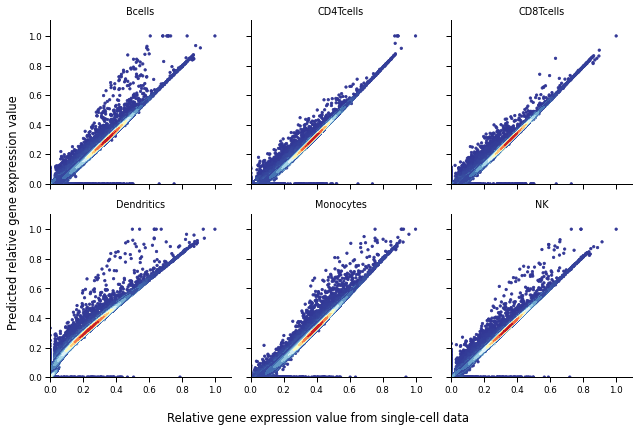

In [5]:
fig, axes = plt.subplots(2,3,sharex=True,sharey=True,figsize=(9, 6))
names=['Bcells', 'CD4Tcells', 'CD8Tcells', 'Dendritics', 'Monocytes', 'NK']
for i in range(6):
    values = np.vstack([orisigm[i,:], trainsigm[i,:]])
    kernel = stats.gaussian_kde(values)(values)
    axes[i//3,i%3].scatter(x=orisigm[i,:],y=trainsigm[i,:],cmap="RdYlBu_r",c=kernel,marker='.')
    sns.kdeplot(x=orisigm[i,:],y=trainsigm[i,:],fill=True,thresh=0.2, cmap="RdYlBu_r",ax=axes[i//3,i%3])
    axes[i//3,i%3].set_title(names[i])
    axes[i//3,i%3].spines['top'].set_visible(False)
    axes[i//3,i%3].spines['right'].set_visible(False)
plt.xlim(0,)
plt.ylim(0,)
fig.supxlabel('Relative gene expression value from single-cell data')
fig.supylabel('Predicted relative gene expression value')
plt.tight_layout()
fig.savefig('concordance_simu.eps', format='eps', dpi=300)
plt.show()

In [32]:
gene_pearson = pd.DataFrame(np.concatenate((np.array(real_gene_pearson).reshape(-1,1),np.array(simu_gene_pearson).reshape(-1,1)),axis=1),columns=['adapt2real_r','adapt2simu_r'])
gene_ccc = pd.DataFrame(np.concatenate((np.array(real_gene_ccc).reshape(-1,1),np.array(simu_gene_ccc).reshape(-1,1)),axis=1),columns=['adapt2real_ccc','adapt2simu_ccc'])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


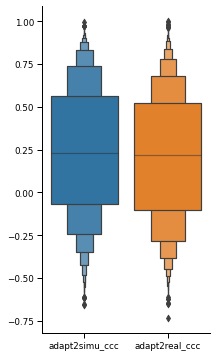

In [28]:
fig, ax = plt.subplots(figsize=(3, 6))
sns.boxenplot(data=gene_ccc,ax=ax,order=['adapt2simu_ccc','adapt2real_ccc'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.savefig('genelevel_ccc.eps', format='eps', dpi=300)

In [29]:
gene_ccc.to_csv('gene_level_ccc.csv')